<a href="https://colab.research.google.com/github/23AD083/MLOPS_INTERNSHIP/blob/main/1752561781877_IrisandHF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn # update the new version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 95.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [2]:
import pickle
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Train model
model = DecisionTreeClassifier()
model.fit(X, y)

# Save model
with open("iris_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as iris_model.pkl")


✅ Model saved as iris_model.pkl


In [3]:
app_code = """
import gradio as gr
import pickle
import numpy as np

# Load the trained model
with open("iris_model.pkl", "rb") as f:
    model = pickle.load(f)

# Define prediction function
def predict(sepal_length, sepal_width, petal_length, petal_width):
    x = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    y_pred = model.predict(x)[0]
    classes = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
    return f"🌸 Predicted class: {classes[y_pred]}"

# Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Sepal Length"),
        gr.Number(label="Sepal Width"),
        gr.Number(label="Petal Length"),
        gr.Number(label="Petal Width"),
    ],
    outputs="text",
    title="Iris Flower Classifier"
)

interface.launch()
"""

with open("app.py", "w") as f:
    f.write(app_code)

print("✅ app.py saved")


✅ app.py saved


In [4]:
requirements = """
scikit-learn>=1.2
gradio>=4.0.0
"""

with open("requirements.txt", "w") as f:
    f.write(requirements.strip())

print("✅ requirements.txt saved")


✅ requirements.txt saved


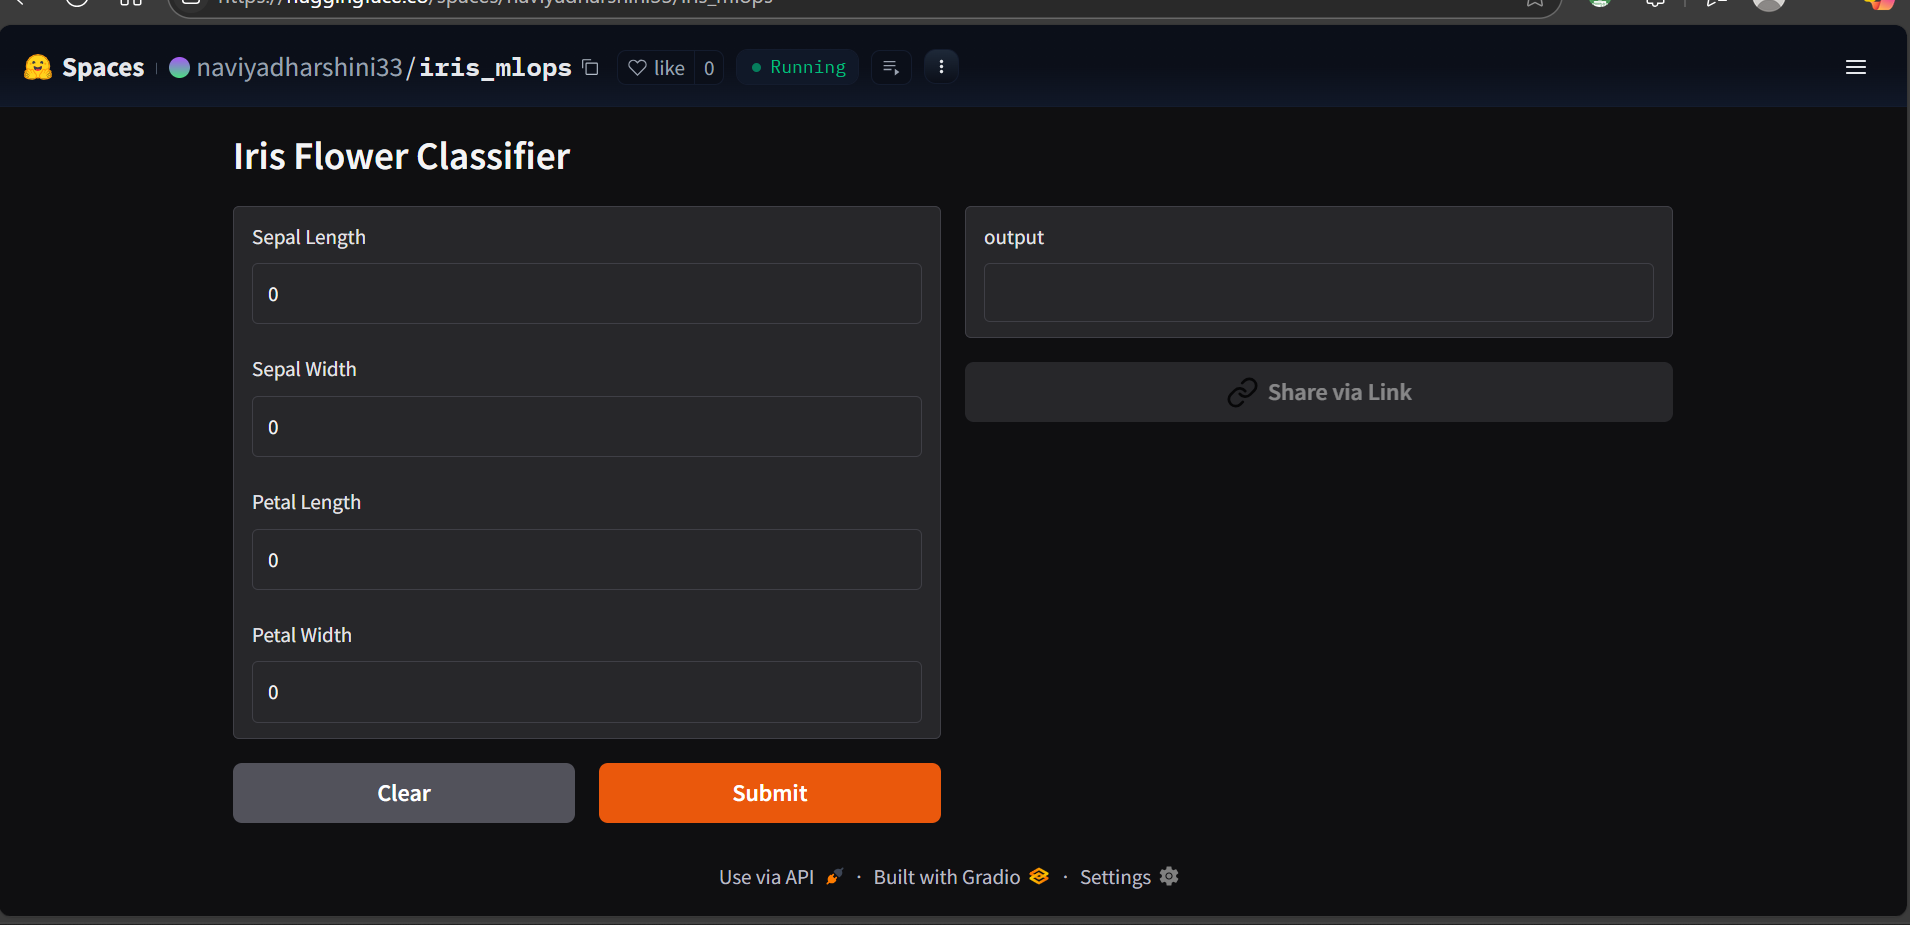